# Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("avocado.xlsx")
df

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0               0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1 2015-12-20          1.35      54876.98   674.28   44638.81   
2               2 2015-12-13          0.93     118220.22   794.70  109149.67   
3               3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4 2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...        ...           ...           ...      ...        ...   
18244           7 2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8 2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9 2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10 2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11 2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

# Exploratory Data Analysis:

In [3]:
df.shape

(18249, 14)

In [4]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [5]:
#Let's drop  Unnamed column
df.drop("Unnamed: 0",axis=1, inplace=True)

In [6]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [8]:
df["Month"] = df["Date"].dt.month

In [9]:
df["Day"] = df["Date"].dt.day

In [10]:
df.drop("Date",axis=1,inplace=True)

In [11]:
df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany     12    6  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7  

[18249 rows x 14 columns]

In [12]:
df.columns

Index(['AveragePrice', 'Total Volume',           4046,           4225,
                 4770,   'Total Bags',   'Small Bags',   'Large Bags',
        'XLarge Bags',         'type',         'year',       'region',
              'Month',          'Day'],
      dtype='object')

In [13]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

<AxesSubplot:>

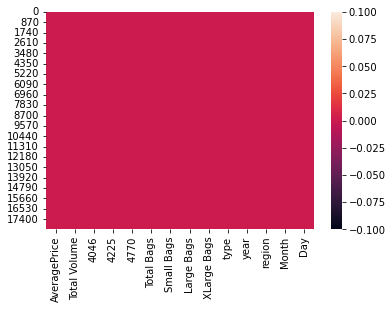

In [14]:
sns.heatmap(df.isnull())

# Data Visualisation:

Univariate Analysis

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

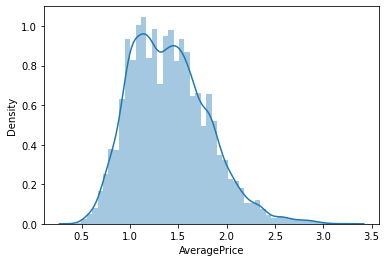

In [15]:
sns.distplot(df['AveragePrice'])

In [16]:
df.columns

Index(['AveragePrice', 'Total Volume',           4046,           4225,
                 4770,   'Total Bags',   'Small Bags',   'Large Bags',
        'XLarge Bags',         'type',         'year',       'region',
              'Month',          'Day'],
      dtype='object')

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

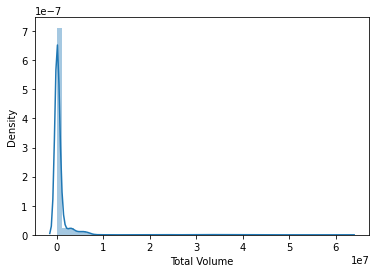

In [17]:
sns.distplot(df['Total Volume'])

<AxesSubplot:xlabel='type', ylabel='count'>

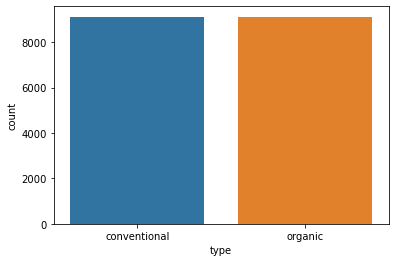

In [18]:
sns.countplot(df['type'])

conventional    9126
organic         9123
Name: type, dtype: int64


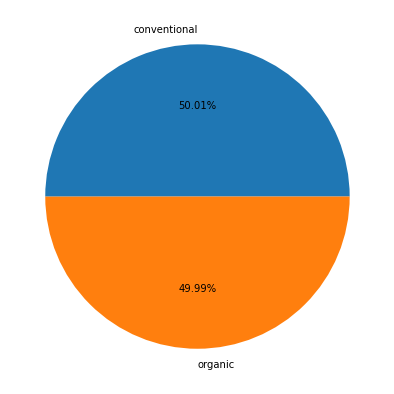

In [19]:
print(df["type"].value_counts())
fig,x = plt.subplots(figsize=(15,7))
labels='conventional','organic'
x.pie(df['type'].value_counts(),labels=labels,autopct='%0.2f%%')
plt.show()

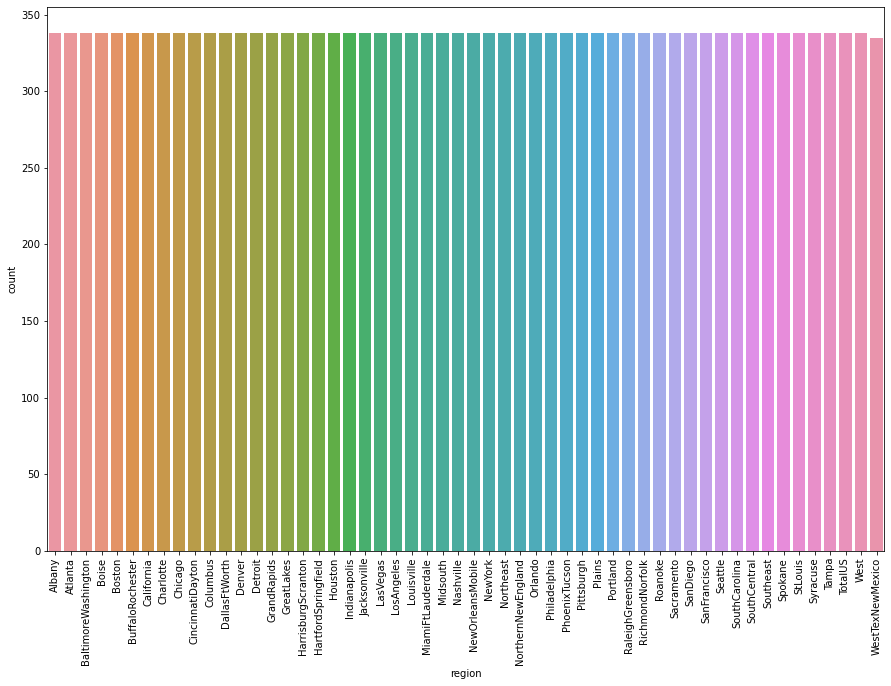

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(df["region"])
plt.xticks(rotation=90)
plt.show()

Mulivariate Analysis:

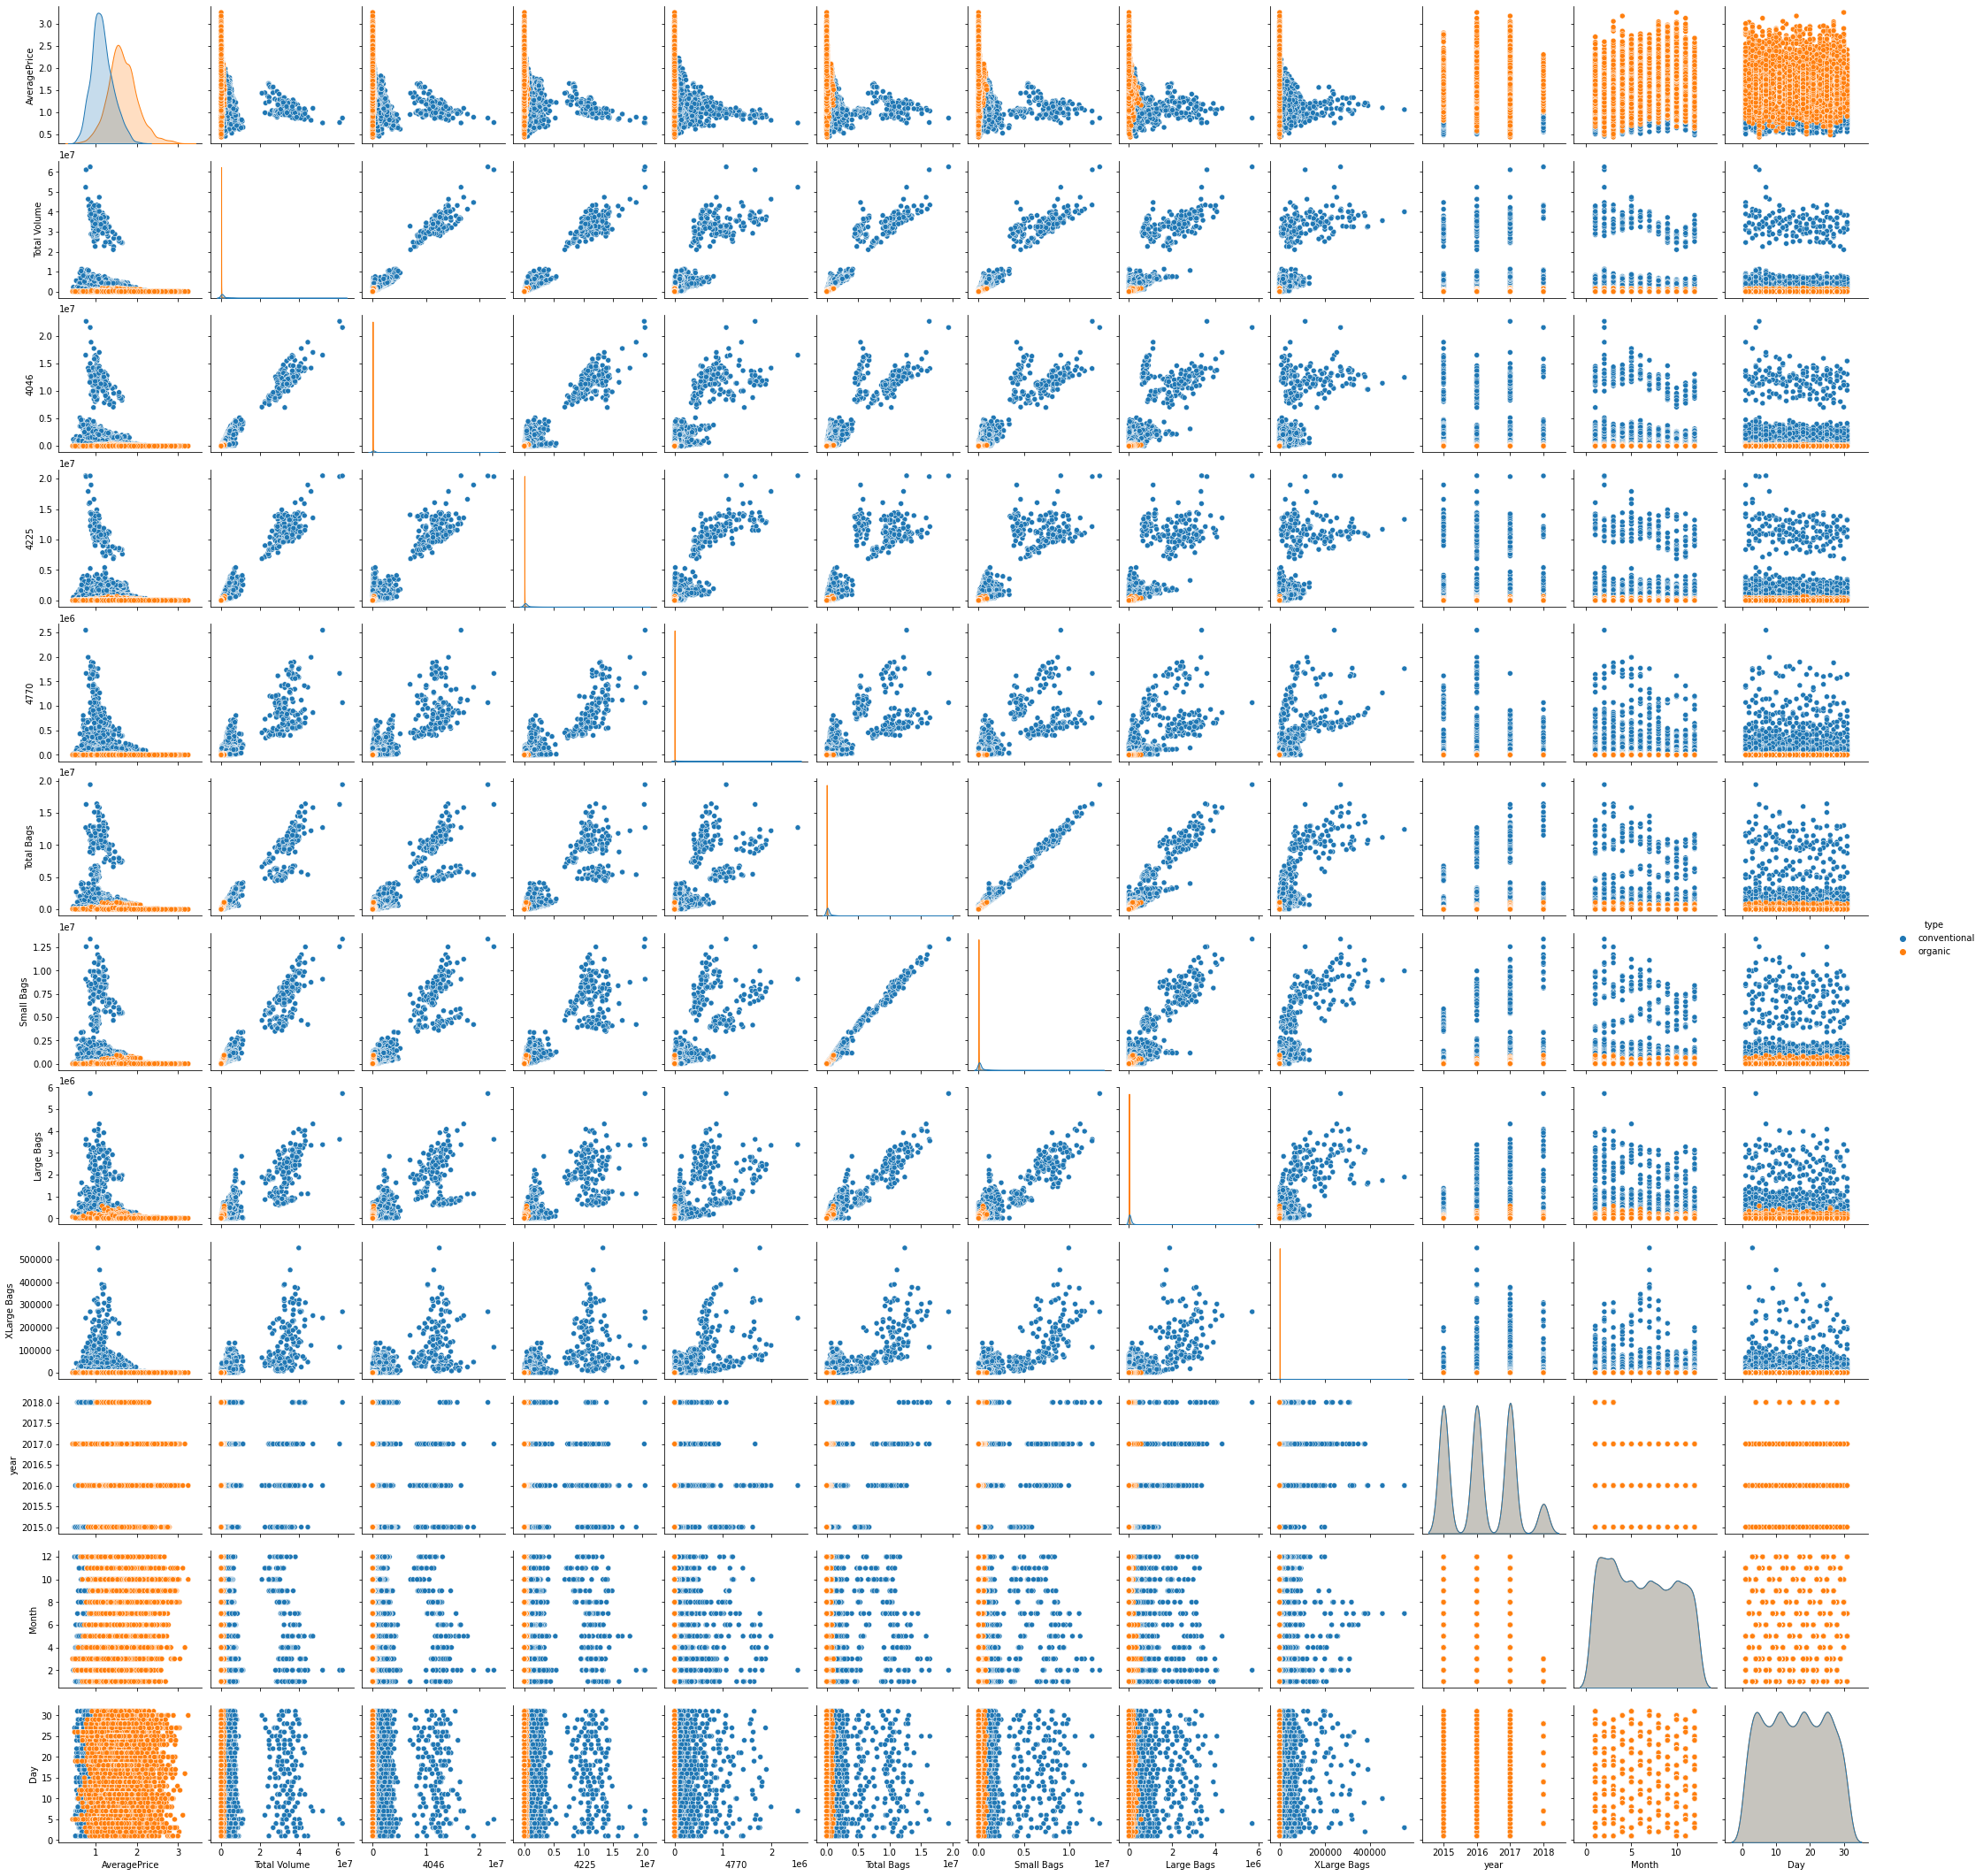

In [21]:
sns.pairplot(df,hue="type")

# Outliers:

<AxesSubplot:>

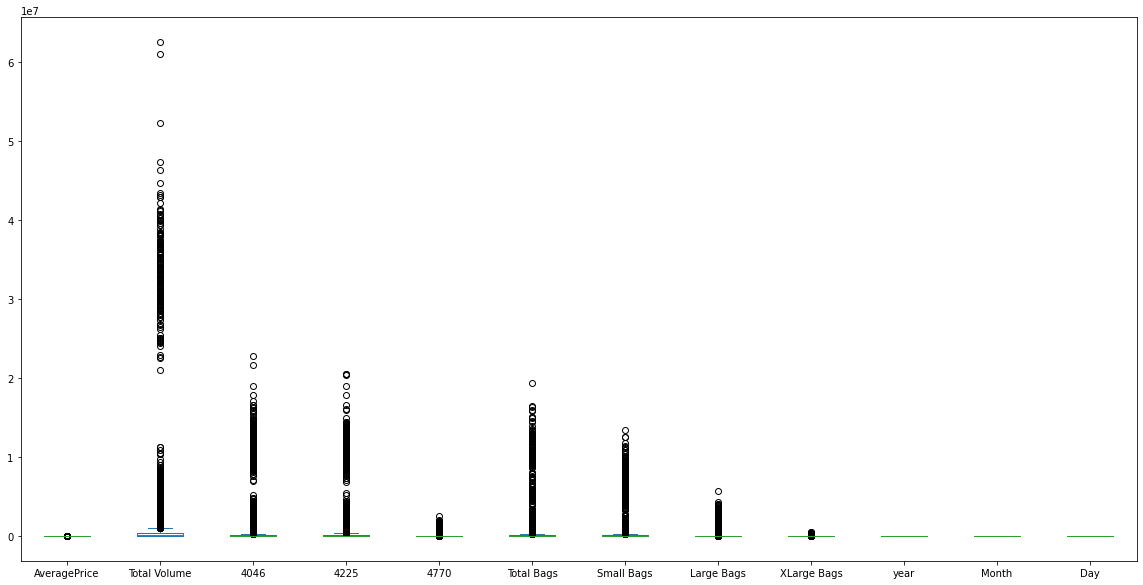

In [22]:
df.plot(kind='box',fontsize=10,figsize=(20,10))

# Removing Outliers:

In [23]:
df.columns

Index(['AveragePrice', 'Total Volume',           4046,           4225,
                 4770,   'Total Bags',   'Small Bags',   'Large Bags',
        'XLarge Bags',         'type',         'year',       'region',
              'Month',          'Day'],
      dtype='object')

In [24]:
df1=df.drop(columns=['AveragePrice','year','Month','Day','type','region',],axis=1).copy()

In [25]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
df_new=df[(z<3).all(axis=1)]
df_new

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany     12    6  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7  

[17782 rows x 14 columns]

In [26]:
df.shape

(18249, 14)

In [27]:
df_new.shape

(17782, 14)

# Percentage of Loss:

In [28]:
Data_loss=(18249-17782)/18249*100
Data_loss

2.55904433119623

# Skewness:

In [29]:
df_new.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [30]:
df2=df_new.drop(columns=['AveragePrice','year','Month','Day','type','region',],axis=1).copy()
df2

Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0          64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1          54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2         118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3          78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4          51039.60   941.48   43838.39   75.78     6183.95     5986.26   
...             ...      ...        ...     ...         ...         ...   
18244      17074.83  2046.96    1529.20    0.00    13498.67    13066.82   
18245      13888.04  1191.70    3431.50    0.00     9264.84     8940.04   
18246      13766.76  1191.92    2452.79  727.94     9394.11     9351.80   
18247      16205.22  1527.63    2981.04  727.01    10969.54    10919.54   
18248      17489.58  2894.77    2356.13  224.53    12014.15    11988.14   

       Large Bags  XLarge Bags  
0           93.25          0.0  
1           97.49          0.0  
2          103.14          0.0  
3          133.76          0.0  
4          197.69          0.0  
...           ...          ...  
18244      431.85          0.0  
18245      324.80          0.0  
18246       42.31          0.0  
18247       50.00          0.0  
18248       26.01          0.0  

[17782 rows x 8 columns]

In [31]:
df_new

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany     12    6  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7  

[17782 rows x 14 columns]

In [32]:
df2

Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0          64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1          54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2         118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3          78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4          51039.60   941.48   43838.39   75.78     6183.95     5986.26   
...             ...      ...        ...     ...         ...         ...   
18244      17074.83  2046.96    1529.20    0.00    13498.67    13066.82   
18245      13888.04  1191.70    3431.50    0.00     9264.84     8940.04   
18246      13766.76  1191.92    2452.79  727.94     9394.11     9351.80   
18247      16205.22  1527.63    2981.04  727.01    10969.54    10919.54   
18248      17489.58  2894.77    2356.13  224.53    12014.15    11988.14   

       Large Bags  XLarge Bags  
0           93.25          0.0  
1           97.49          0.0  
2          103.14          0.0  
3          133.76          0.0  
4          197.69          0.0  
...           ...          ...  
18244      431.85          0.0  
18245      324.80          0.0  
18246       42.31          0.0  
18247       50.00          0.0  
18248       26.01          0.0  

[17782 rows x 8 columns]

In [33]:
features=df2.columns

In [34]:
features

Index(['Total Volume',           4046,           4225,           4770,
         'Total Bags',   'Small Bags',   'Large Bags',  'XLarge Bags'],
      dtype='object')

In [35]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [36]:
df_new[features] = scaler.fit_transform(df_new[features].values)
df_new[features].head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  XLarge Bags  
0   -0.775214    -0.675702  
1   -0.765237    -0.675702  
2   -0.752534    -0.675702  
3   -0.693012    -0.675702  
4   -0.600755    -0.675702

In [37]:
df_new.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [38]:
#Let's remove skewness of XLarge Bags
df_new["XLarge Bags"] = np.log1p(df_new["XLarge Bags"])

In [39]:
df_new.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

# Encoding:

In [40]:
#checking for nominal data
cat_col = ["type","region"]

In [41]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cat_col]=df_new[cat_col].apply(LE.fit_transform)

# Correlation:

In [42]:
df.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   
Month             0.162409     -0.024689 -0.025803 -0.022108 -0.033424   
Day               0.027386     -0.009747 -0.010159 -0.012393 -0.009009   

              Total Bags  Small Bags  Large Bags  XLarge Bags      year  \
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.093197   
Total Volume    0.963047    0.967238    0.880640     0.747157  0.017193   
4046            0.920057    0.925280    0.838645     0.699377  0.003353   
4225            0.905787    0.916031    0.810015     0.688809 -0.009559   
4770            0.792314    0.802733    0.698471     0.679861 -0.036531   
Total Bags      1.000000    0.994335    0.943009     0.804233  0.071552   
Small Bags      0.994335    1.000000    0.902589     0.806845  0.063915   
Large Bags      0.943009    0.902589    1.000000     0.710858  0.087891   
XLarge Bags     0.804233    0.806845    0.710858     1.000000  0.081033   
year            0.071552    0.063915    0.087891     0.081033  1.000000   
Month          -0.022724   -0.023126   -0.020187    -0.012969 -0.177050   
Day            -0.004988   -0.003870   -0.008352     0.000319  0.004475   

                 Month       Day  
AveragePrice  0.162409  0.027386  
Total Volume -0.024689 -0.009747  
4046         -0.025803 -0.010159  
4225         -0.022108 -0.012393  
4770         -0.033424 -0.009009  
Total Bags   -0.022724 -0.004988  
Small Bags   -0.023126 -0.003870  
Large Bags   -0.020187 -0.008352  
XLarge Bags  -0.012969  0.000319  
year         -0.177050  0.004475  
Month         1.000000  0.010621  
Day           0.010621  1.000000

<AxesSubplot:>

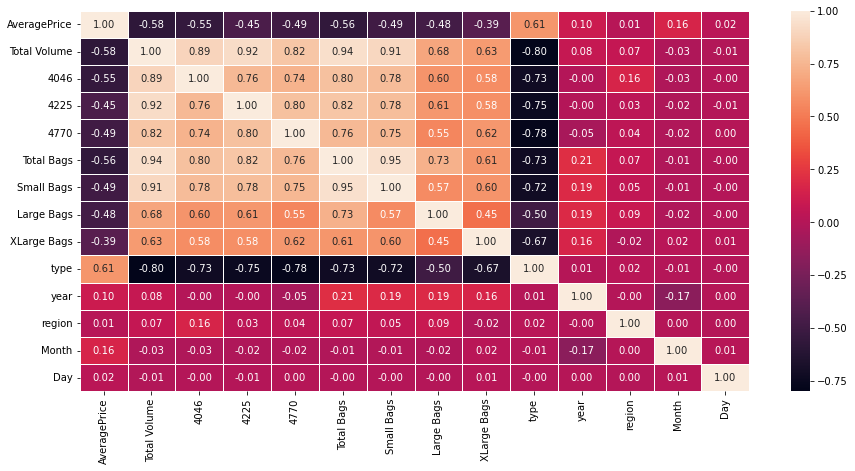

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df_new.corr(),annot=True,linewidth=0.5,fmt='.2f')

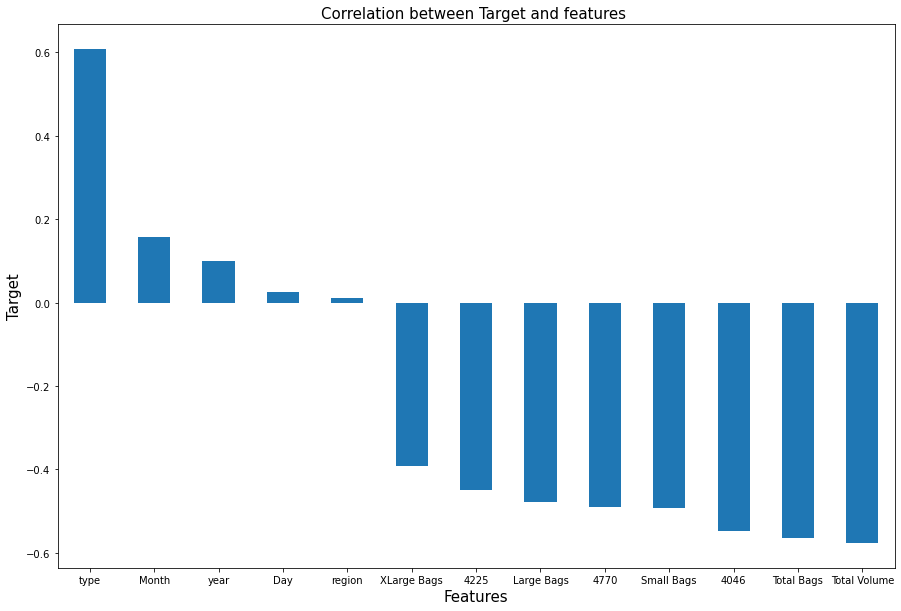

In [44]:
plt.figure(figsize=(15,10))
df_new.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.xticks(rotation=360)
plt.title('Correlation between Target and features ',fontsize=15)
plt.show()

In [45]:
x = df_new.drop('region',axis=1)
y = df_new['region']

# Scaling:

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0         -0.212660     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1         -0.162942     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2         -1.207026      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3         -0.834139      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4         -0.336956     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   
...             ...           ...       ...       ...       ...         ...   
17777      0.533114     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   
17778      0.731987     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   
17779      1.129733     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   
17780      1.278888     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   
17781      0.508255     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   

       Small Bags  Large Bags  XLarge Bags      type      year     Month  \
0       -0.337064   -0.775214    -0.685946 -1.026443 -1.214908  1.641434   
1       -0.301038   -0.765237    -0.685946 -1.026443 -1.214908  1.641434   
2       -0.364044   -0.752534    -0.685946 -1.026443 -1.214908  1.641434   
3       -0.500341   -0.693012    -0.685946 -1.026443 -1.214908  1.641434   
4       -0.479918   -0.600755    -0.685946 -1.026443 -1.214908  1.358706   
...           ...         ...          ...       ...       ...       ...   
17777   -0.165765   -0.405895    -0.685946  0.974238  1.979143 -1.185845   
17778   -0.321645   -0.478556    -0.685946  0.974238  1.979143 -1.468572   
17779   -0.303466   -0.945246    -0.685946  0.974238  1.979143 -1.468572   
17780   -0.240252   -0.910471    -0.685946  0.974238  1.979143 -1.468572   
17781   -0.201685   -1.042930    -0.685946  0.974238  1.979143 -1.468572   

            Day  
0      1.289235  
1      0.491750  
2     -0.305734  
3     -1.103219  
4      1.517088  
...         ...  
17777 -1.331072  
17778  1.403161  
17779  0.605677  
17780 -0.191808  
17781 -0.989293  

[17782 rows x 13 columns]

# Variance Inflation Factor:

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values      Features
0     2.269645  AveragePrice
1    53.086532  Total Volume
2     6.822232          4046
3    12.222552          4225
4     3.967981          4770
5    35.481110    Total Bags
6    17.223208    Small Bags
7     3.479097    Large Bags
8     2.065849   XLarge Bags
9     4.244014          type
10    1.537827          year
11    1.144185         Month
12    1.001683           Day

In [48]:
x.drop("Total Volume",axis=1, inplace=True)

In [49]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values      Features
0     2.215091  AveragePrice
1     3.573590          4046
2     4.647112          4225
3     3.957577          4770
4    26.722505    Total Bags
5    17.211849    Small Bags
6     3.428534    Large Bags
7     2.054962   XLarge Bags
8     4.111198          type
9     1.537712          year
10    1.144184         Month
11    1.001667           Day

In [50]:
x.drop("Total Bags",axis=1, inplace=True)

In [51]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values      Features
0     2.029559  AveragePrice
1     3.566557          4046
2     4.354645          4225
3     3.956870          4770
4     4.186308    Small Bags
5     2.067862    Large Bags
6     2.054924   XLarge Bags
7     4.080675          type
8     1.468331          year
9     1.131609         Month
10    1.001653           Day

# Best Random State:

In [52]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [53]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.813325836378971  on Random_state  85


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=85)

# Decision Tree Classifier:

In [55]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy_Score is  ',acc)
print('Confusion Matrix is ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report is ','\n',classification_report(y_test,pred))

Accuracy_Score is   0.8046106269328085
Confusion Matrix is  
 [[48  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  0]
 [ 0  0 58 ...  0  0  0]
 ...
 [ 0  0  0 ... 29  0  0]
 [ 0  0  0 ...  1 48  0]
 [ 0  1  1 ...  0  0 39]]
Classification Report is  
               precision    recall  f1-score   support

           0       0.86      0.76      0.81        63
           1       0.71      0.81      0.76        62
           2       0.92      0.92      0.92        63
           3       0.72      0.80      0.76        51
           4       0.77      0.85      0.81        59
           5       0.78      0.80      0.79        79
           6       0.98      1.00      0.99        58
           7       0.73      0.81      0.77        54
           8       0.97      0.95      0.96        65
           9       0.78      0.79      0.79        68
          10       0.74      0.68      0.71        75
          11       0.92      0.85      0.89        68
          12       0.83      0.86      0.84        

# Random Forest Classifier:

In [56]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy_Score is ',acc)
print('Confusion_Matrix is ',confusion_matrix(y_test,pred))
print('Classification_Report is ','\n',classification_report(y_test,pred))

Accuracy_Score is  0.9212819791959517
Confusion_Matrix is  [[58  0  0 ...  0  0  0]
 [ 0 56  0 ...  0  0  0]
 [ 0  0 60 ...  0  0  0]
 ...
 [ 0  0  0 ... 29  0  0]
 [ 0  0  0 ...  1 51  0]
 [ 0  1  0 ...  0  0 52]]
Classification_Report is  
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        63
           1       0.84      0.90      0.87        62
           2       0.98      0.95      0.97        63
           3       0.92      0.86      0.89        51
           4       0.93      0.92      0.92        59
           5       0.90      0.87      0.88        79
           6       1.00      1.00      1.00        58
           7       0.93      0.94      0.94        54
           8       0.96      0.98      0.97        65
           9       0.94      0.88      0.91        68
          10       0.94      0.87      0.90        75
          11       0.97      0.97      0.97        68
          12       0.97      0.97      0.97        63


# KNeighbors Classifier:

In [57]:
kn=KNC()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.6156873770030925
[[52  0  0 ...  0  0  0]
 [ 0 35  0 ...  0  0  1]
 [ 0  0 55 ...  0  0  0]
 ...
 [ 0  0  0 ... 29  0  0]
 [ 0  0  0 ...  1 45  0]
 [ 0  2  0 ...  0  0 26]]
              precision    recall  f1-score   support

           0       0.54      0.83      0.65        63
           1       0.31      0.56      0.40        62
           2       0.71      0.87      0.78        63
           3       0.52      0.69      0.59        51
           4       0.60      0.76      0.67        59
           5       0.47      0.56      0.51        79
           6       0.82      0.88      0.85        58
           7       0.41      0.83      0.55        54
           8       0.82      0.89      0.85        65
           9       0.45      0.54      0.49        68
          10       0.34      0.48      0.40        75
          11       0.55      0.82      0.66        68
          12       0.87      0.84      0.85        63
          13       0.37      0.43      0.39        61
          14  

# Cross Validation:

In [58]:
from sklearn.model_selection import cross_val_score
for i in range(2,20):
    cr=cross_val_score(DTC,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  2
cross val score =  3.5541558879766053
at cv=  3
cross val score =  43.39219083342764
at cv=  4
cross val score =  48.14358604971949
at cv=  5
cross val score =  53.9417119177224
at cv=  6
cross val score =  53.610218030169364
at cv=  7
cross val score =  58.78937948576971
at cv=  8
cross val score =  61.072266133495944
at cv=  9
cross val score =  60.64476673670545
at cv=  10
cross val score =  62.25328811133011
at cv=  11
cross val score =  63.99569687952099
at cv=  12
cross val score =  64.60406565332114
at cv=  13
cross val score =  63.9408865090342
at cv=  14
cross val score =  65.65587002254144
at cv=  15
cross val score =  65.64832563688411
at cv=  16
cross val score =  65.7110023052665
at cv=  17
cross val score =  67.61331683725115
at cv=  18
cross val score =  66.69015578590046
at cv=  19
cross val score =  68.43932297492668


In [59]:
print(cross_val_score(DTC,x,y,cv=25).mean())

0.7049664975742346


In [60]:
print(cross_val_score(rfc,x,y,cv=25).mean())

0.8484220673525182


In [64]:
print(cross_val_score(kn,x,y,cv=25).mean())

0.5152641476635219


So,Random Forest Classifier is the best Model.

# Saving the Model:

In [61]:
import pickle
filename='Avocado.pkl'
pickle.dump(rfc, open(filename,'wb'))

# Now,let's take Average Price as Target variable

In [124]:
df=pd.read_excel('avocado.xlsx')
df

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0               0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1 2015-12-20          1.35      54876.98   674.28   44638.81   
2               2 2015-12-13          0.93     118220.22   794.70  109149.67   
3               3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4 2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...        ...           ...           ...      ...        ...   
18244           7 2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8 2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9 2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10 2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11 2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

# EDA:

In [125]:
df.shape

(18249, 14)

In [126]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [127]:
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [129]:
df=df.drop(["Unnamed: 0"],axis=1)

In [130]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [131]:
df["Month"] = df["Date"].dt.month

In [132]:
df["Day"] = df["Date"].dt.day

In [133]:
df.drop("Date",axis=1,inplace=True)

# Visualisation:

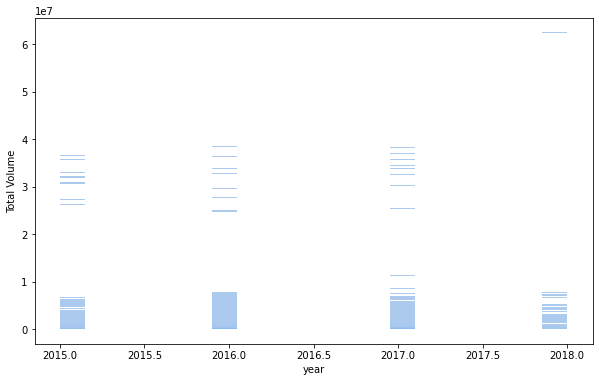

In [134]:
plt.figure(figsize=(10,6))
sns.histplot(x='year',y='Total Volume',data=df)
plt.show()

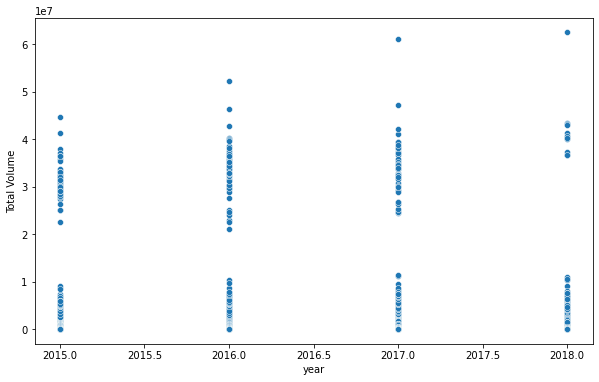

In [135]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='year',y='Total Volume',data=df)
plt.show()

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

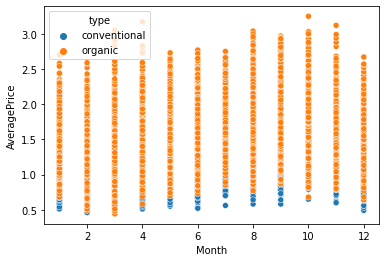

In [136]:
sns.scatterplot(x="Month", y="AveragePrice", hue="type",data=df)

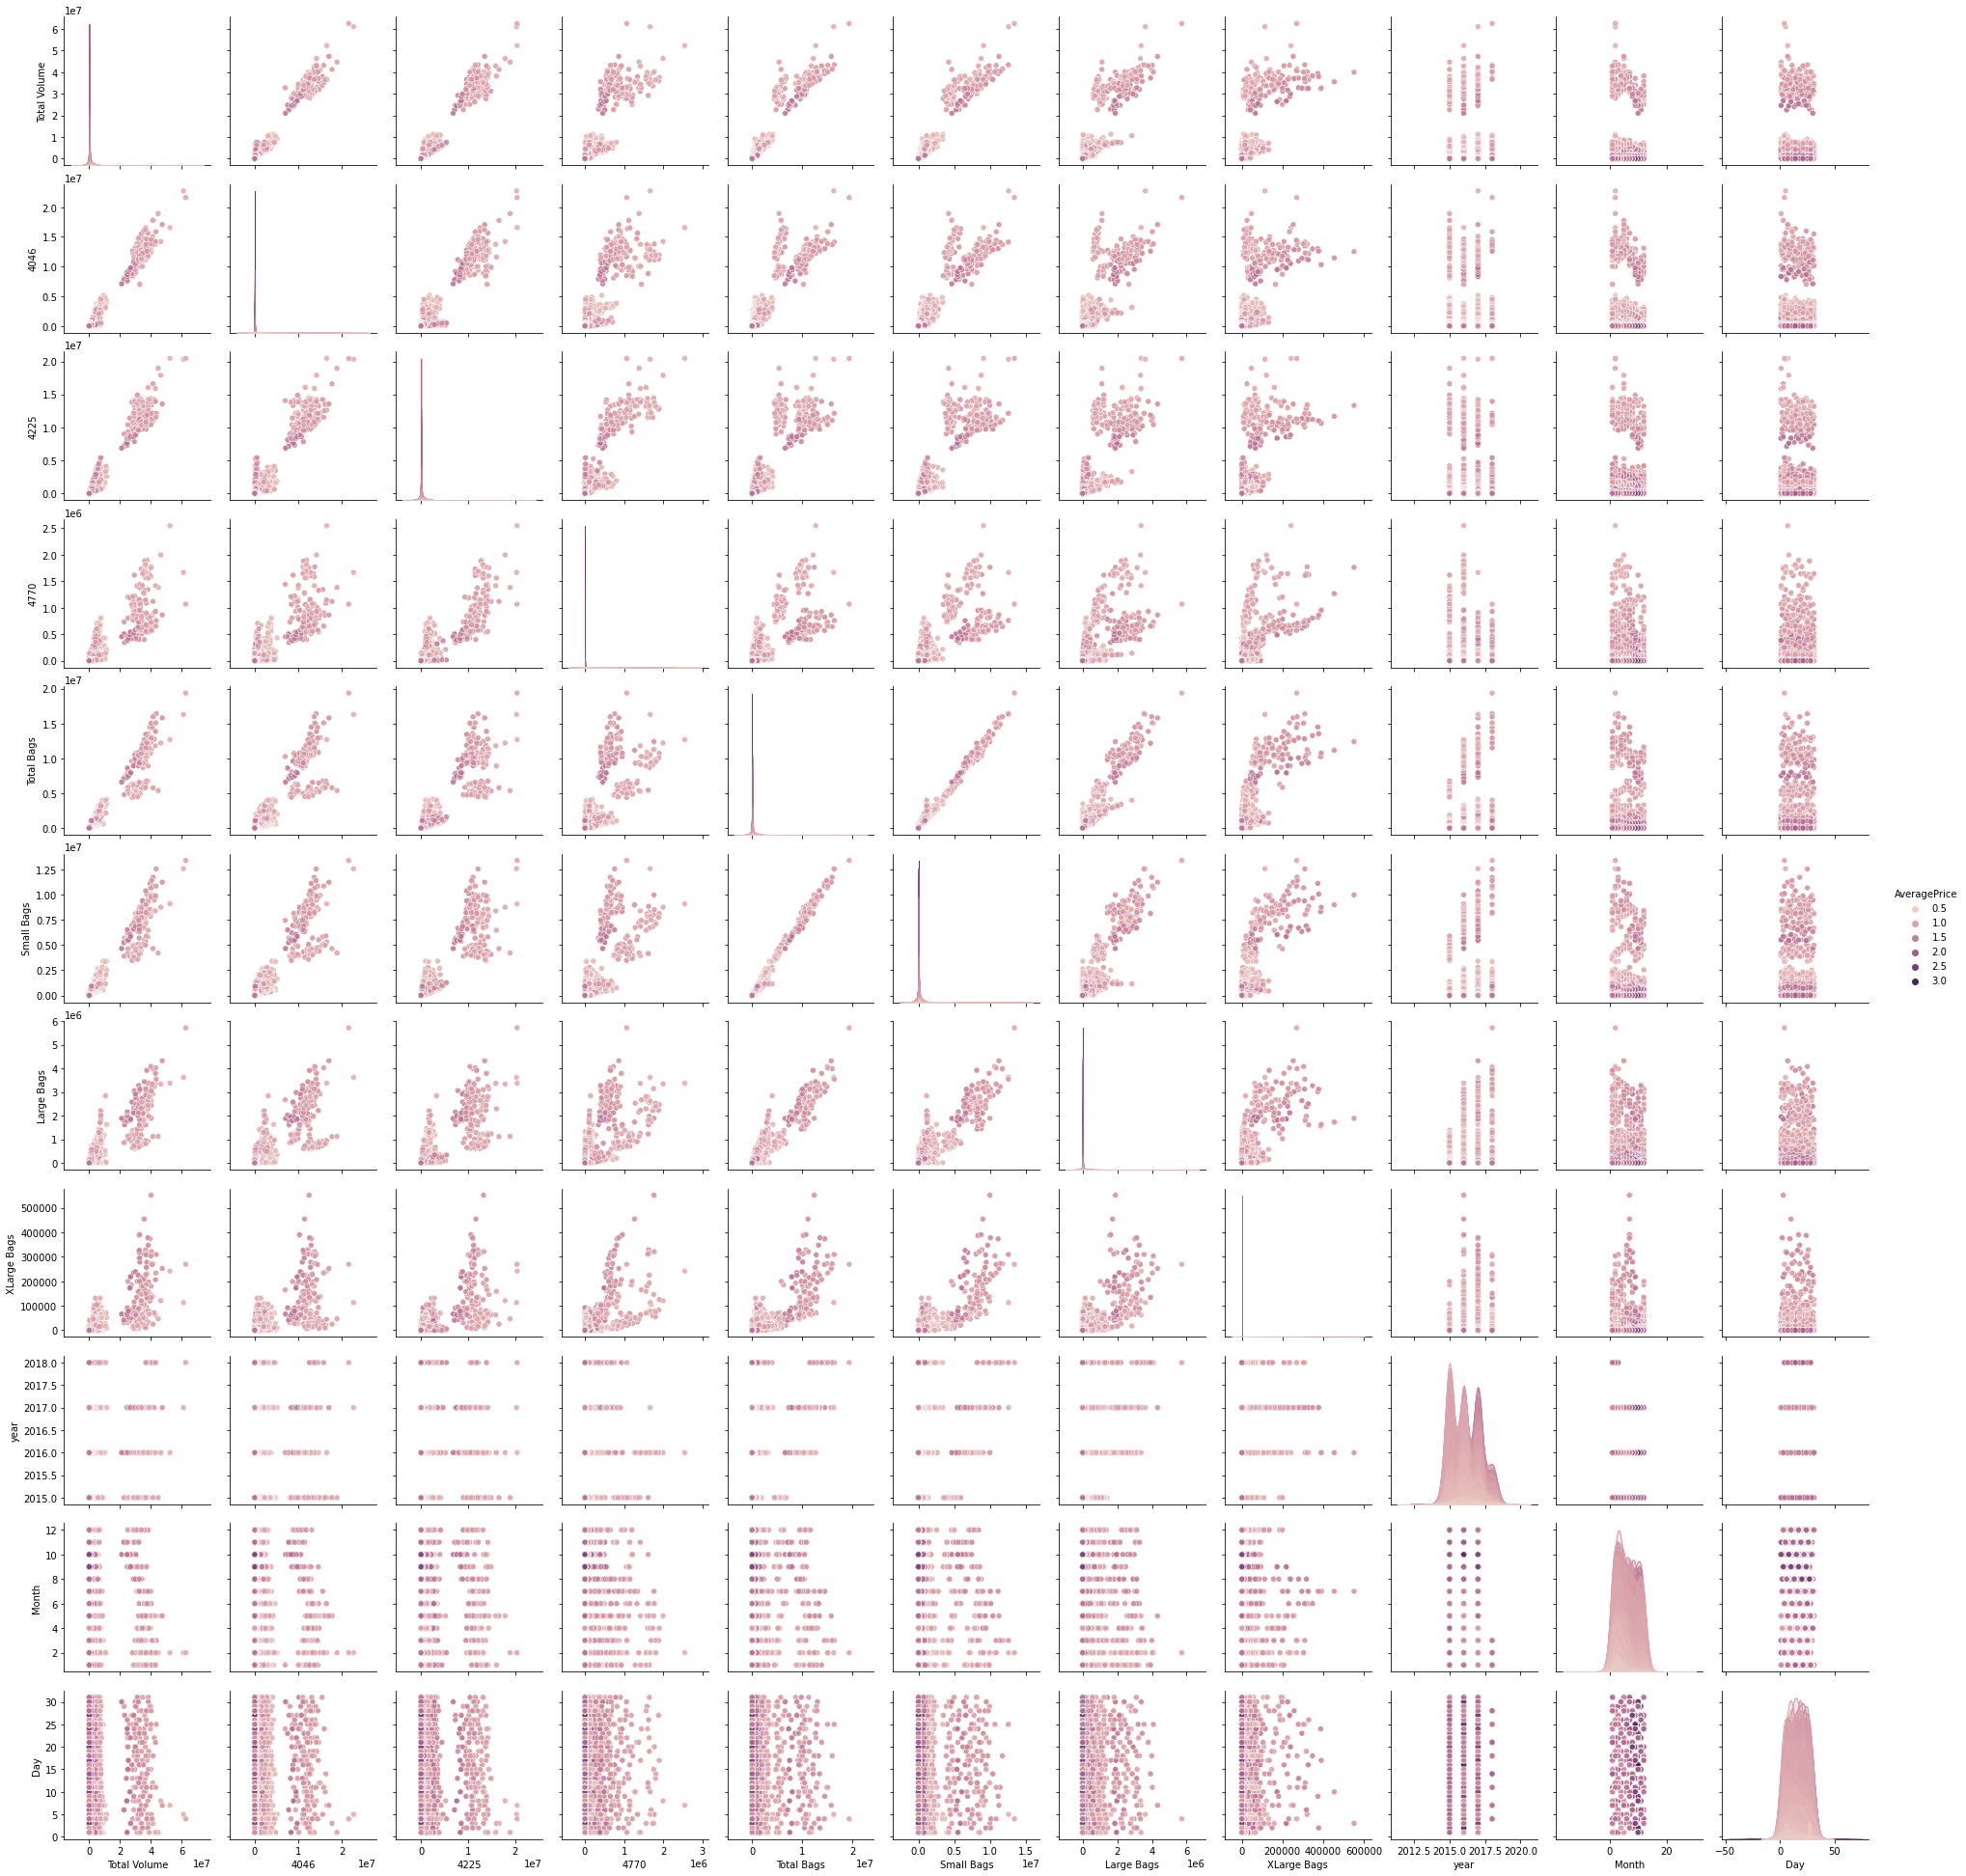

In [137]:
sns.pairplot(df,hue="AveragePrice")

# Outliers:

<AxesSubplot:>

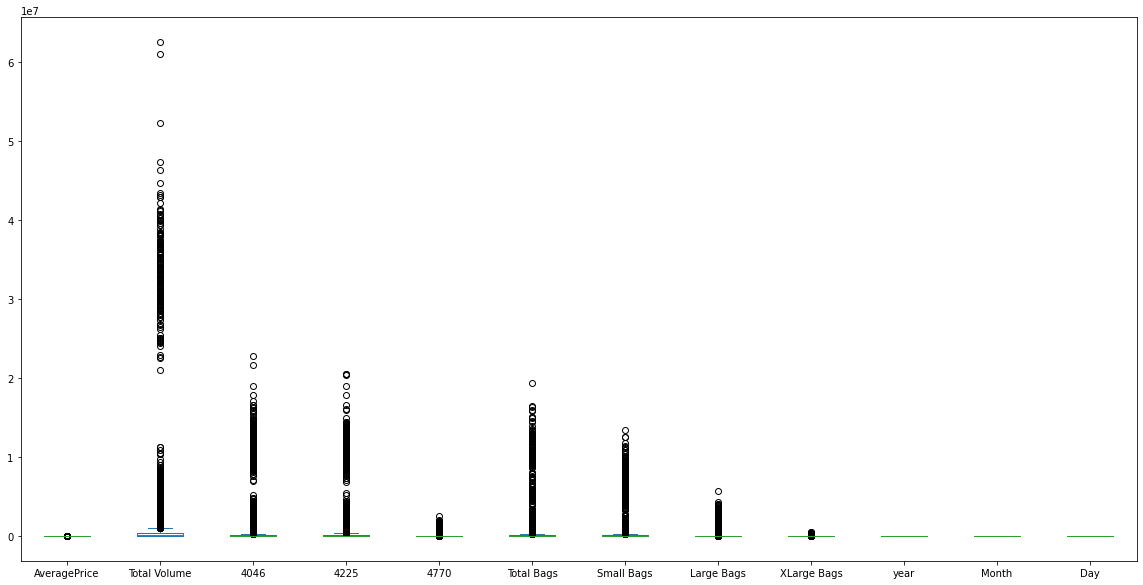

In [138]:
df.plot(kind='box',fontsize=10,figsize=(20,10))

# Removing Outliers:

In [139]:
df.columns

Index(['AveragePrice', 'Total Volume',           4046,           4225,
                 4770,   'Total Bags',   'Small Bags',   'Large Bags',
        'XLarge Bags',         'type',         'year',       'region',
              'Month',          'Day'],
      dtype='object')

In [140]:
df1=df.drop(columns=['AveragePrice','year','Month','Day','type','region',],axis=1).copy()

In [141]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
df_new=df[(z<3).all(axis=1)]
df_new

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany     12    6  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7  

[17782 rows x 14 columns]

In [142]:
df.shape

(18249, 14)

In [143]:
df_new.shape

(17782, 14)

# Percentage of Loss:

In [144]:
Data_loss = (18249-17782)/18249*100
Data_loss

2.55904433119623

# Skewness:

In [145]:
df_new.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [146]:
df3=df_new.drop(columns=['AveragePrice','year','Month','Day','type','region',],axis=1).copy()
df3

Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0          64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1          54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2         118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3          78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4          51039.60   941.48   43838.39   75.78     6183.95     5986.26   
...             ...      ...        ...     ...         ...         ...   
18244      17074.83  2046.96    1529.20    0.00    13498.67    13066.82   
18245      13888.04  1191.70    3431.50    0.00     9264.84     8940.04   
18246      13766.76  1191.92    2452.79  727.94     9394.11     9351.80   
18247      16205.22  1527.63    2981.04  727.01    10969.54    10919.54   
18248      17489.58  2894.77    2356.13  224.53    12014.15    11988.14   

       Large Bags  XLarge Bags  
0           93.25          0.0  
1           97.49          0.0  
2          103.14          0.0  
3          133.76          0.0  
4          197.69          0.0  
...           ...          ...  
18244      431.85          0.0  
18245      324.80          0.0  
18246       42.31          0.0  
18247       50.00          0.0  
18248       26.01          0.0  

[17782 rows x 8 columns]

In [147]:
features=df3.columns

In [148]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [149]:
df_new[features] = scaler.fit_transform(df_new[features].values)
df_new[features].head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  XLarge Bags  
0   -0.775214    -0.675702  
1   -0.765237    -0.675702  
2   -0.752534    -0.675702  
3   -0.693012    -0.675702  
4   -0.600755    -0.675702

In [150]:
df_new.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [151]:
df_new["XLarge Bags"] = np.log1p(df_new["XLarge Bags"])

# Encoding:

In [152]:
cat_col = ["type","region"]

In [153]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cat_col]=df_new[cat_col].apply(LE.fit_transform)

# Correlation:

In [154]:
df_new.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.576829 -0.548618 -0.448579 -0.491320   
Total Volume     -0.576829      1.000000  0.889083  0.924160  0.818568   
4046             -0.548618      0.889083  1.000000  0.764679  0.736523   
4225             -0.448579      0.924160  0.764679  1.000000  0.796799   
4770             -0.491320      0.818568  0.736523  0.796799  1.000000   
Total Bags       -0.564616      0.939776  0.799354  0.818511  0.761641   
Small Bags       -0.493621      0.905098  0.778765  0.784901  0.754305   
Large Bags       -0.477879      0.681427  0.601899  0.614878  0.548457   
XLarge Bags      -0.392262      0.629752  0.575152  0.583293  0.617192   
type              0.608447     -0.800828 -0.725826 -0.747722 -0.780988   
year              0.099910      0.076584 -0.002396 -0.004533 -0.051657   
region            0.010428      0.065709  0.159390  0.032273  0.037805   
Month             0.157900     -0.026332 -0.025919 -0.024708 -0.017377   
Day               0.024742     -0.006248 -0.004558 -0.005919  0.001383   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.564616   -0.493621   -0.477879    -0.392262  0.608447   
Total Volume    0.939776    0.905098    0.681427     0.629752 -0.800828   
4046            0.799354    0.778765    0.601899     0.575152 -0.725826   
4225            0.818511    0.784901    0.614878     0.583293 -0.747722   
4770            0.761641    0.754305    0.548457     0.617192 -0.780988   
Total Bags      1.000000    0.949901    0.729652     0.612530 -0.725686   
Small Bags      0.949901    1.000000    0.566307     0.601404 -0.720466   
Large Bags      0.729652    0.566307    1.000000     0.451796 -0.500026   
XLarge Bags     0.612530    0.601404    0.451796     1.000000 -0.672461   
type           -0.725686   -0.720466   -0.500026    -0.672461  1.000000   
year            0.210924    0.185955    0.190295     0.156202  0.007399   
region          0.065996    0.051985    0.086573    -0.017598  0.021970   
Month          -0.014571   -0.010260   -0.016942     0.020885 -0.005044   
Day            -0.003703   -0.000535   -0.000876     0.010991 -0.002469   

                  year    region     Month       Day  
AveragePrice  0.099910  0.010428  0.157900  0.024742  
Total Volume  0.076584  0.065709 -0.026332 -0.006248  
4046         -0.002396  0.159390 -0.025919 -0.004558  
4225         -0.004533  0.032273 -0.024708 -0.005919  
4770         -0.051657  0.037805 -0.017377  0.001383  
Total Bags    0.210924  0.065996 -0.014571 -0.003703  
Small Bags    0.185955  0.051985 -0.010260 -0.000535  
Large Bags    0.190295  0.086573 -0.016942 -0.000876  
XLarge Bags   0.156202 -0.017598  0.020885  0.010991  
type          0.007399  0.021970 -0.005044 -0.002469  
year          1.000000 -0.003610 -0.173166  0.004044  
region       -0.003610  1.000000  0.002175  0.000751  
Month        -0.173166  0.002175  1.000000  0.010456  
Day           0.004044  0.000751  0.010456  1.000000

<AxesSubplot:>

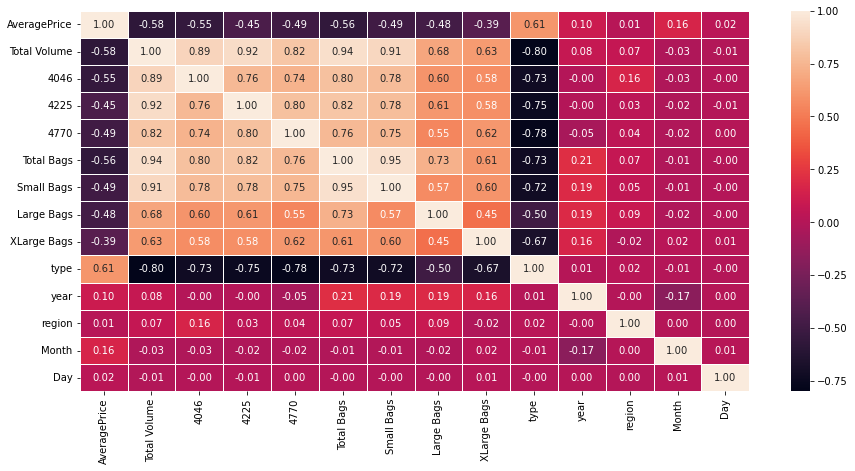

In [155]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df_new.corr(),annot=True,linewidth=0.5,fmt='.2f')

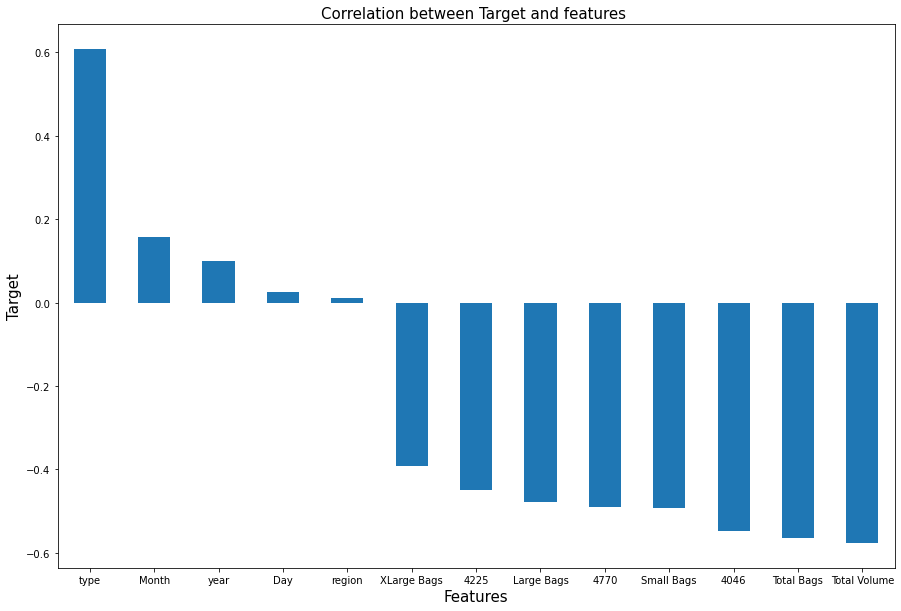

In [156]:
plt.figure(figsize=(15,10))
df_new.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.xticks(rotation=360)
plt.title('Correlation between Target and features ',fontsize=15)
plt.show()

In [157]:
df_new.drop("Day",axis=1,inplace=True)
df_new.drop("region",axis=1,inplace=True)

In [158]:
x = df_new.drop('AveragePrice',axis=1)
y = df_new['AveragePrice']

# Scaling:

In [159]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1         -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2          0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3          0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4         -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   
...             ...       ...       ...       ...         ...         ...   
17777     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   -0.165765   
17778     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   -0.321645   
17779     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   -0.303466   
17780     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   -0.240252   
17781     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   -0.201685   

       Large Bags  XLarge Bags      type      year     Month  
0       -0.775214    -0.685946 -1.026443 -1.214908  1.641434  
1       -0.765237    -0.685946 -1.026443 -1.214908  1.641434  
2       -0.752534    -0.685946 -1.026443 -1.214908  1.641434  
3       -0.693012    -0.685946 -1.026443 -1.214908  1.641434  
4       -0.600755    -0.685946 -1.026443 -1.214908  1.358706  
...           ...          ...       ...       ...       ...  
17777   -0.405895    -0.685946  0.974238  1.979143 -1.185845  
17778   -0.478556    -0.685946  0.974238  1.979143 -1.468572  
17779   -0.945246    -0.685946  0.974238  1.979143 -1.468572  
17780   -0.910471    -0.685946  0.974238  1.979143 -1.468572  
17781   -1.042930    -0.685946  0.974238  1.979143 -1.468572  

[17782 rows x 11 columns]

# Variance Inflation Factor:

In [160]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values      Features
0    51.806476  Total Volume
1     6.808776          4046
2    11.158951          4225
3     3.951861          4770
4    34.441003    Total Bags
5    16.630696    Small Bags
6     3.462408    Large Bags
7     2.065369   XLarge Bags
8     3.720176          type
9     1.386160          year
10    1.053985         Month

In [161]:
x.drop("Total Volume",axis=1, inplace=True)

In [162]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values     Features
0    3.546068         4046
1    4.272321         4225
2    3.936681         4770
3   24.479948   Total Bags
4   16.630524   Small Bags
5    3.419283   Large Bags
6    2.053729  XLarge Bags
7    3.487456         type
8    1.383630         year
9    1.051817        Month

In [163]:
x.drop("Total Bags",axis=1, inplace=True)

In [164]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values     Features
0    3.527072         4046
1    4.127765         4225
2    3.936426         4770
3    4.098464   Small Bags
4    1.864199   Large Bags
5    2.053482  XLarge Bags
6    3.484298         type
7    1.359151         year
8    1.051183        Month

# Best Random State:

In [165]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [166]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    mod = KNN()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8666077410567096  on Random_state  3


In [174]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=3)

# K-Neighbors Regressor:

In [171]:
KN=KNeighborsRegressor()
KN.fit(x_train,y_train)
pred=KN.predict(x_test)
acc=r2_score(y_test,pred)
print('Accuracy_score is ',acc)

Accuracy_score is  0.8745655336203002


# Random Forest Regressor:

In [172]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
acc=r2_score(y_test,pred)
print('Accuracy_score is ',acc)

Accuracy_score is  0.880499545990347


# Decision Tree Regressor:

In [175]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
acc=r2_score(y_test,pred)
print('Accuracy_score is ',acc)

Accuracy_score is  0.7342159075973613


# Saving the Model:

In [178]:
import pickle
filename='Avocado.pkl'
pickle.dump(RFR,open(filename,'wb'))